# Lab | Cleaning categorical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

Data Analysis Process
Remember the process:
Case Study
Get data
Cleaning/Wrangling/EDA
Processing Data
Modeling -Validation
Reporting
Instructions
Import the necessary libraries load the data and start a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

Find all of the categorical data. Save it in a categorical_df variable.

Check for NaN values and decide what to do with them, do it now.

Check all unique values of columns.

Check dtypes. Do they all make sense as categorical data?

Does any column contain alpha and numeric data? Decide how to clean it and do it now.

Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [20]:
categorical_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis-Copy1.csv')
display(categorical_df.shape)
customer.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [41]:
# creating the variable for finding the all categorical. 
# categorical_df = customer_df.select_dtypes(include=object) 

In [22]:
categorical_df.info() # Checking the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [23]:
categorical_df.isnull().sum() # No null values 

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [24]:
cols = [] # Initialize an empty list cols to store the modified column names.
for i in range(len(categorical_df.columns)): # Loop over each column name in "customer_df" using "range function (len(customer_df.columns))"
    cols.append(categorical_df.columns[i].lower().replace(' ', '_')) # methods --> .lower() and .replace(' ', '_') on each column
categorical_df.columns = cols

In [25]:
categorical_df.head(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [26]:
categorical_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [27]:
# Checking the unique values in the categorical columns
for col in categorical_df.columns:
    print(categorical_df[col].unique())

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
[ 2763.519279  6979.535903 12887.43165  ...  8163.890428  7524.442436
  2611.836866]
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
[56274     0 48767 ... 66367 7

# Check dtypes. Do they all make sense as categorical data?

In [28]:
categorical_df.dtypes # Yes, all of them are objects, so it appears that they would be suitable as categorical data.

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

# Does any column contain alpha and numeric data? Decide how to clean it and do it now.

In [29]:
categorical_df.head(5)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Yes, Some of the columns contains the alpha and numeric data. will probably drop it. 
* Customer
* Policy
* Renew offer type 

# Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

In [30]:
categorical_df.state.value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [31]:
categorical_df.response.value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [32]:
categorical_df.coverage.value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [33]:
categorical_df.education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [34]:
categorical_df.policy.value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

# Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

will drop Policy

In [35]:
categorical_df = categorical_df.drop(['policy'], axis = 1) # drop policy
categorical_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,32,5,0,1,Corporate Auto,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,13,42,0,8,Personal Auto,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,18,38,0,2,Personal Auto,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,18,65,0,7,Corporate Auto,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,12,44,0,1,Personal Auto,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,18,89,0,2,Personal Auto,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,14,28,0,1,Corporate Auto,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,9,37,3,2,Corporate Auto,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,34,3,0,3,Personal Auto,Offer3,Branch,691.200000,Four-Door Car,Large


Change offer1 to offerA, as we need on categoricals. no alpha numeric in categoricals. 

In [36]:
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].replace(['Offer1', 'Offer2', 'Offer3','Offer4'], ['OfferA', 'OfferB', 'OfferC','OfferD'])
categorical_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,32,5,0,1,Corporate Auto,OfferA,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,13,42,0,8,Personal Auto,OfferC,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,18,38,0,2,Personal Auto,OfferA,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,18,65,0,7,Corporate Auto,OfferA,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,12,44,0,1,Personal Auto,OfferA,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,18,89,0,2,Personal Auto,OfferB,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,14,28,0,1,Corporate Auto,OfferA,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,9,37,3,2,Corporate Auto,OfferA,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,34,3,0,3,Personal Auto,OfferC,Branch,691.200000,Four-Door Car,Large


In [37]:
categorical_df = categorical_df.drop(['customer'], axis = 1) # drop customer
categorical_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,32,5,0,1,Corporate Auto,OfferA,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,13,42,0,8,Personal Auto,OfferC,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,18,38,0,2,Personal Auto,OfferA,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate Auto,OfferA,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,12,44,0,1,Personal Auto,OfferA,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,18,89,0,2,Personal Auto,OfferB,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,14,28,0,1,Corporate Auto,OfferA,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,9,37,3,2,Corporate Auto,OfferA,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,34,3,0,3,Personal Auto,OfferC,Branch,691.200000,Four-Door Car,Large


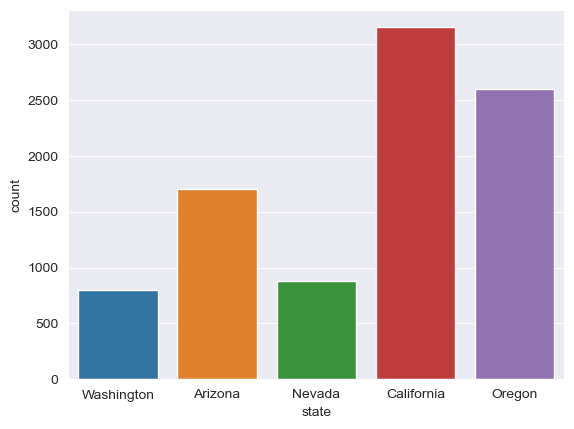

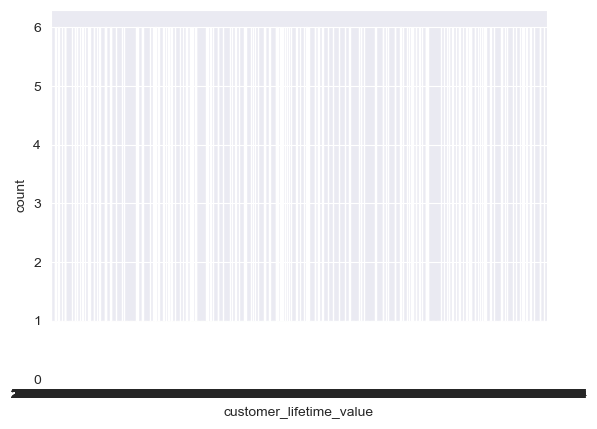

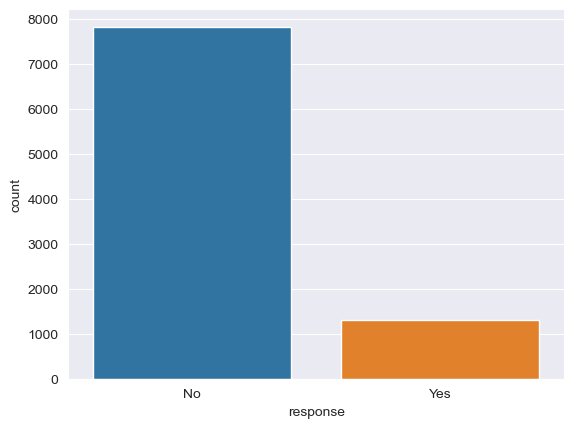

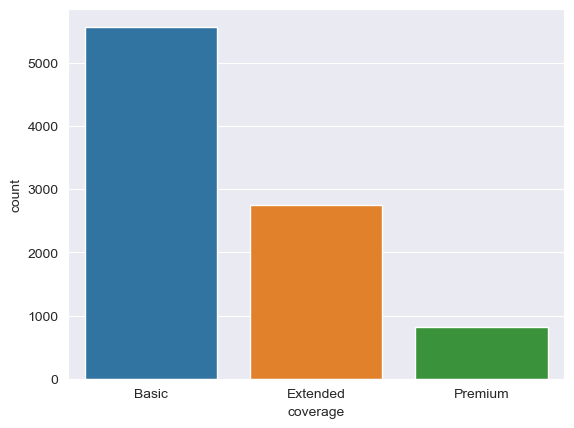

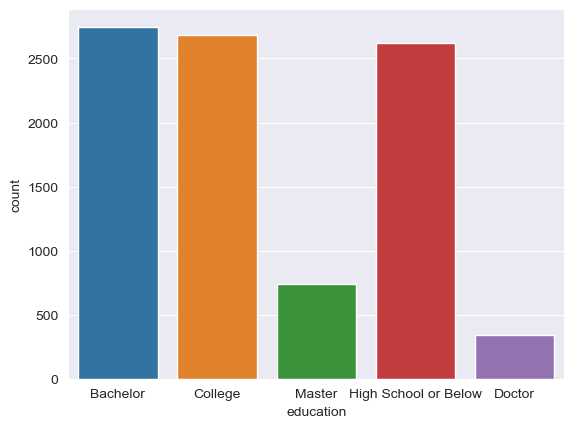

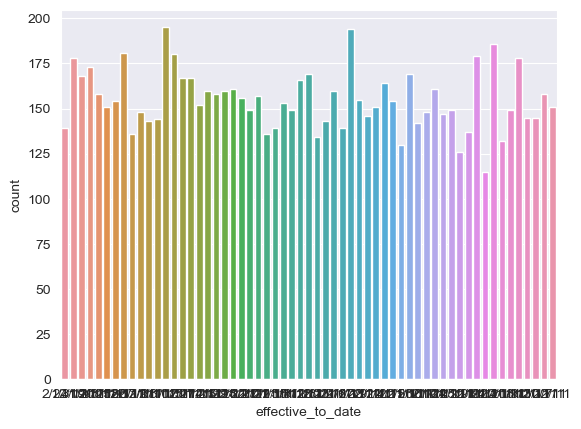

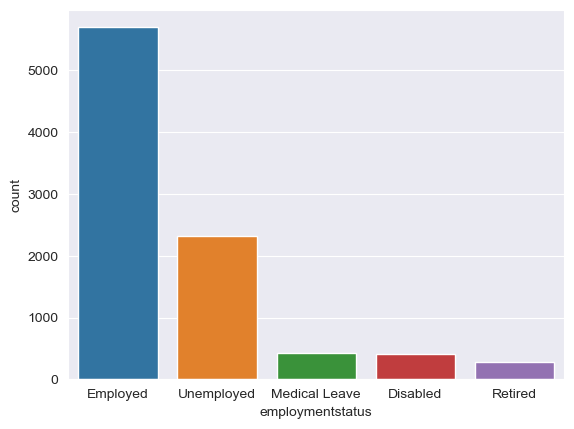

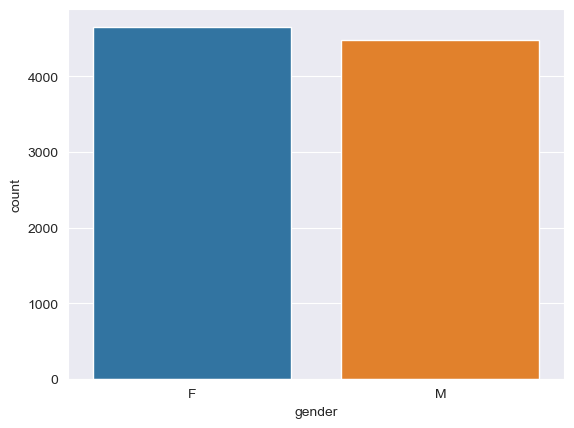

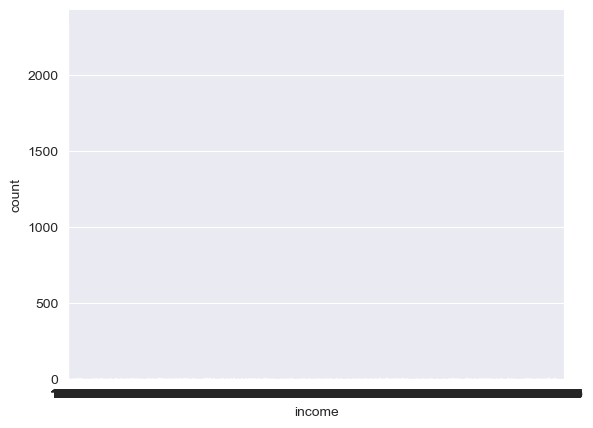

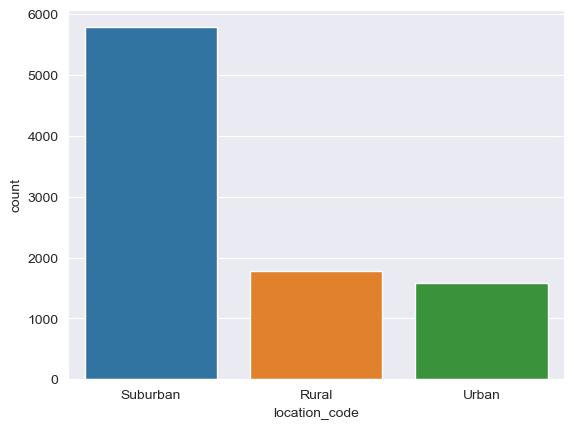

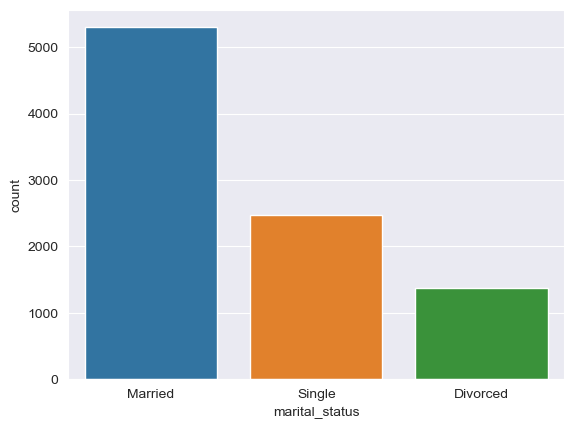

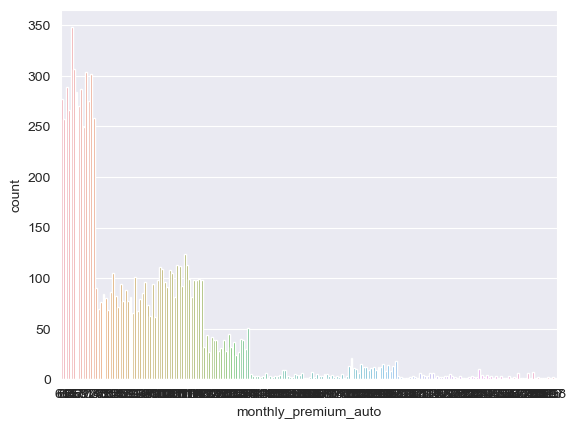

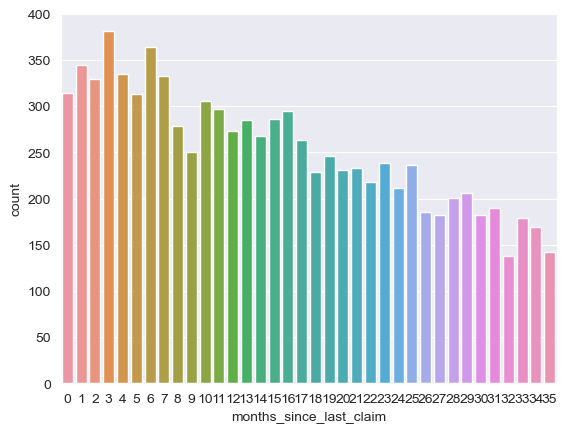

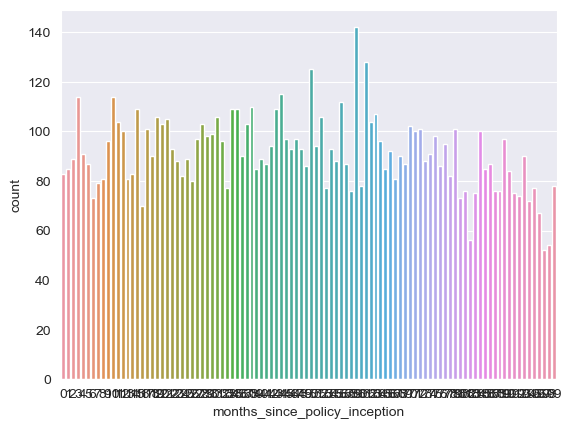

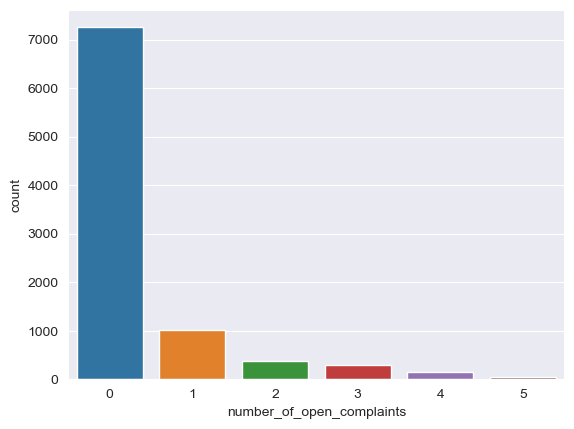

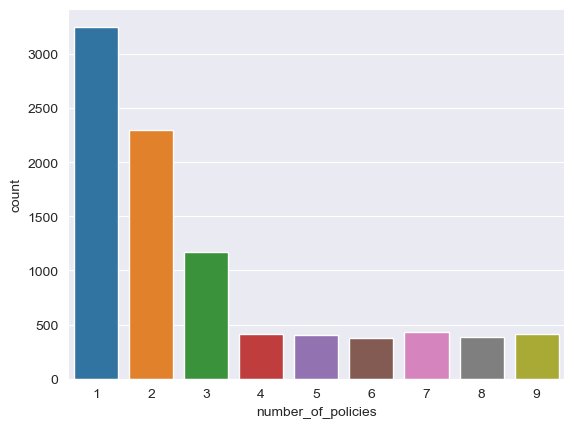

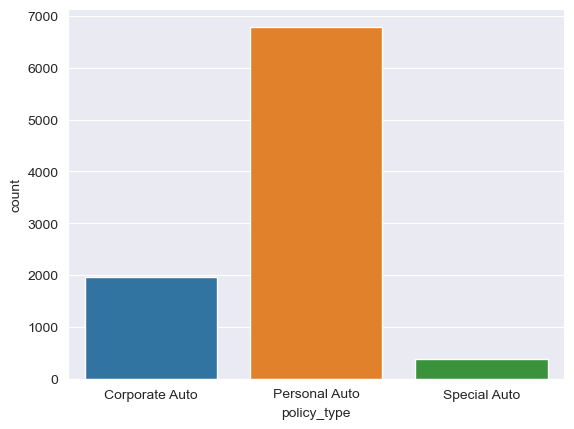

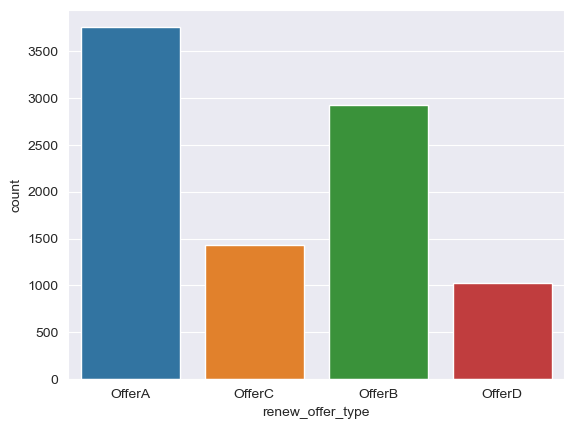

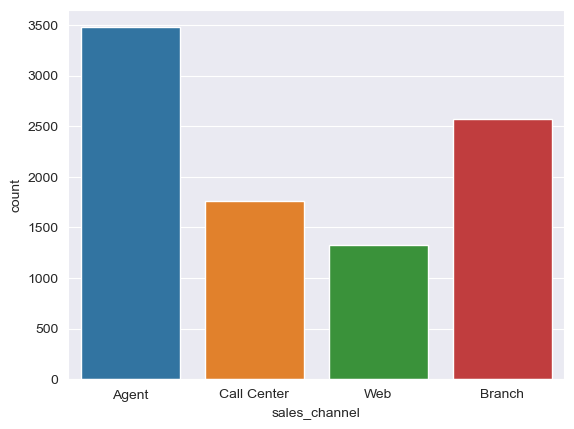

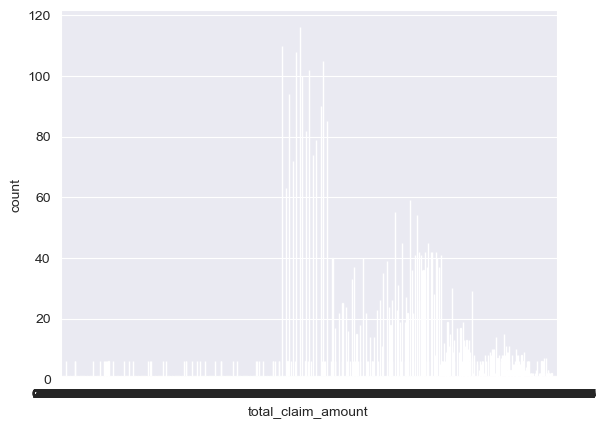

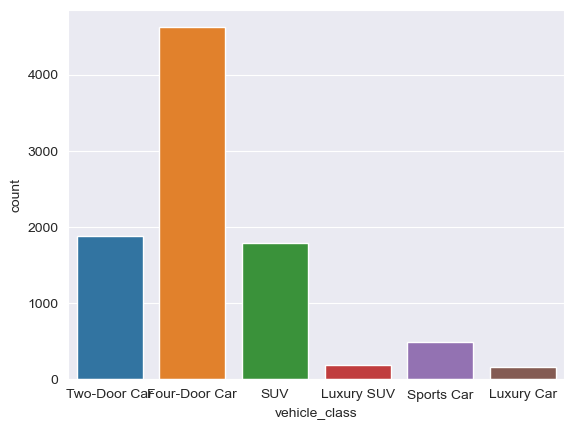

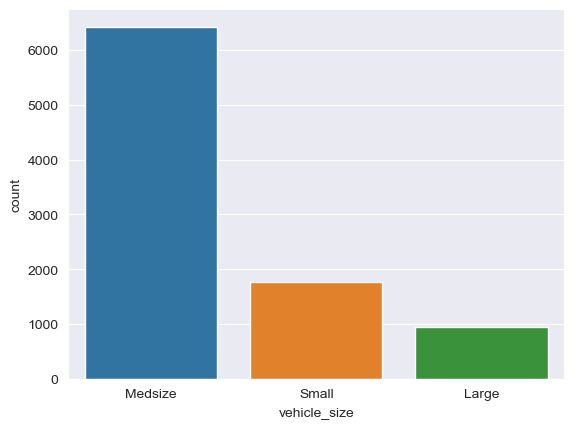

In [38]:
def cntplot_cat(categorical_df):
    for column in categorical_df.columns:
        sns.countplot(x=categorical_df[column])
        plt.show()
    return None
   

cntplot_cat(categorical_df)

Lets combine the education into only 4 categories. 

In [ ]:
top_three_educations = categorical_df["education"].value_counts().index[:3]
categorical_df["education"] = np.where(categorical_df["education"].isin(top_three_educations), categorical_df["education"], 'Post-Uni')
categorical_df["education"].value_counts(dropna=False)


In [ ]:
educations_count

In [ ]:
vehicle_class = categorical_df["vehicle_class"].value_counts().index[:3]
categorical_df["vehicle_class"] = np.where(categorical_df["vehicle_class"].isin(vehicle_class), categorical_df["vehicle_class"], 'Luxury')

In [ ]:
categorical_df["vehicle_class"].value_counts(dropna=False)

In [ ]:
categorical_df

In [ ]:
categorical["policy_type"].value_counts(dropna=False)

In [ ]:
# Saving the categorical to csv
categorical_df.to_csv('categorical_encoding.csv', index=False)

# ![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

## Data Analysis Process
#### Remember the process:

- Case Study
- Get data
- **Cleaning/Wrangling/EDA**
- Processing Data
- Modeling
 -Validation
- Reporting

### Instructions

1. Open the `categorical` dataframe we created before.
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?  
    Make any changes you feel are necessary.
4. Plot time variable. Can you extract something from it?



In [12]:
categorical = pd.read_csv('categorical_encoding.csv')
categorical.head(10)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,OfferA,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,OfferC,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,OfferA,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,OfferA,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,OfferA,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,OfferB,Web,Two-Door Car,Medsize
6,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,OfferA,Agent,Four-Door Car,Medsize
7,Arizona,No,Premium,Post-Uni,Unemployed,M,Urban,Single,Corporate Auto,OfferA,Agent,Four-Door Car,Medsize
8,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,Corporate Auto,OfferA,Agent,Four-Door Car,Medsize
9,Oregon,No,Extended,College,Employed,F,Urban,Married,Special Auto,OfferB,Branch,Four-Door Car,Medsize


I have noticed the column name is not as others columns, so i am changing employmentstatus to employment_status

In [13]:
categorical = categorical.rename(columns={'employmentstatus': 'employment_status'})

In [14]:
categorical.head(5)

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,OfferA,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,OfferC,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,OfferA,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,OfferA,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,OfferA,Agent,Four-Door Car,Medsize


# Plot all the categorical variables with the proper plot. What can you see?

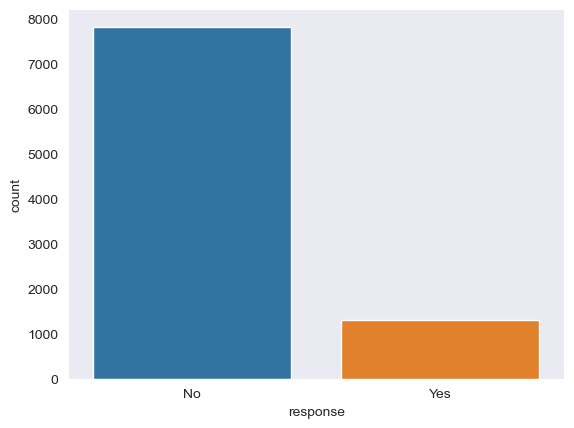

In [15]:
sns.set_style("dark")
plot = sns.countplot(x='response', data=categorical)
plt.show()

In [16]:
#creating response rate as a boolean series
categorical['response_rate'] = categorical['response'] == 'Yes'
categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,response_rate
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,OfferA,Agent,Two-Door Car,Medsize,False
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,OfferC,Agent,Four-Door Car,Medsize,False
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,OfferA,Agent,Two-Door Car,Medsize,False
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,OfferA,Call Center,SUV,Medsize,False
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,OfferA,Agent,Four-Door Car,Medsize,False


In [17]:
categorical["response_rate"] = categorical["response_rate"].astype(int)
categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,response_rate
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,OfferA,Agent,Two-Door Car,Medsize,0
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,OfferC,Agent,Four-Door Car,Medsize,0
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,OfferA,Agent,Two-Door Car,Medsize,0
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,OfferA,Call Center,SUV,Medsize,0
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,OfferA,Agent,Four-Door Car,Medsize,0


In [18]:
plt.style.use('default')

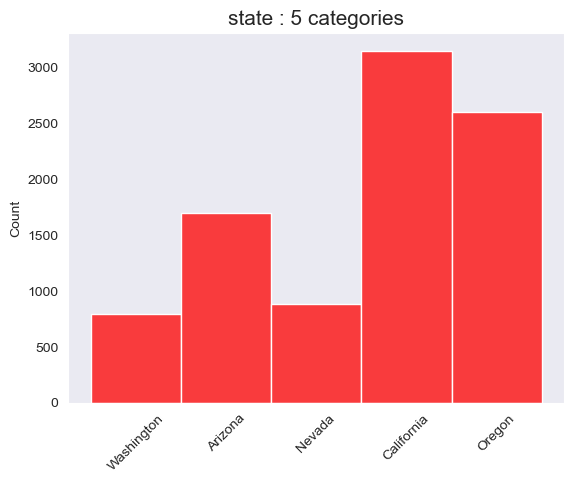

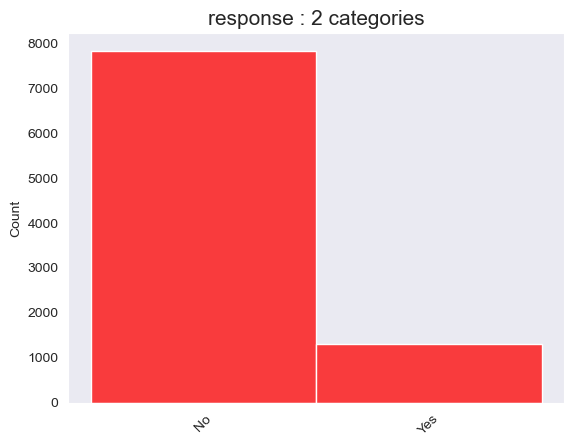

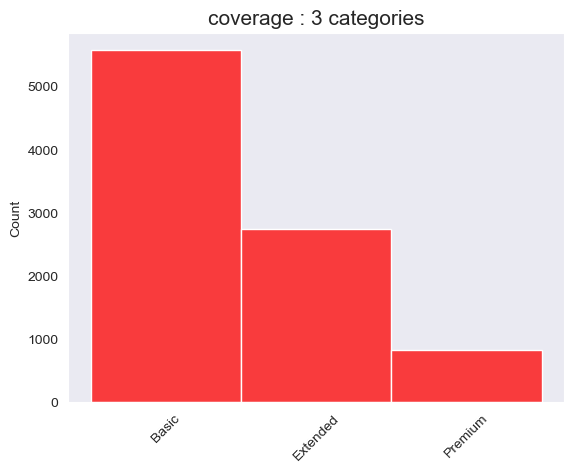

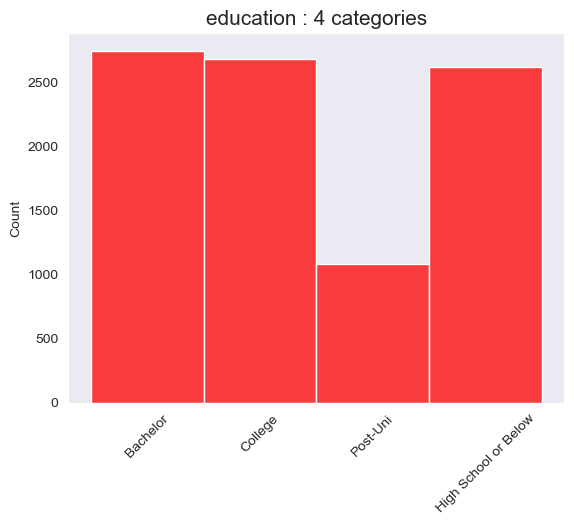

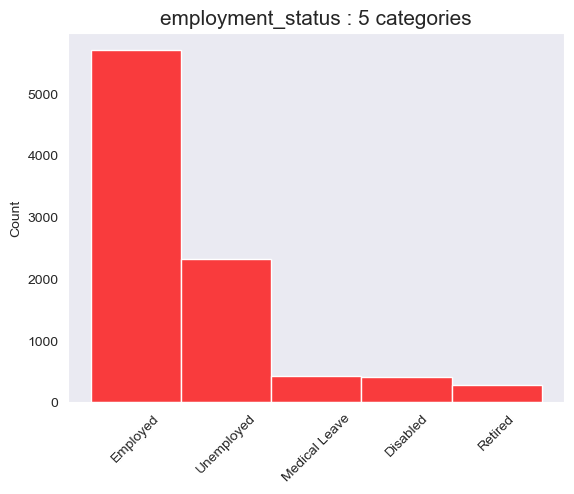

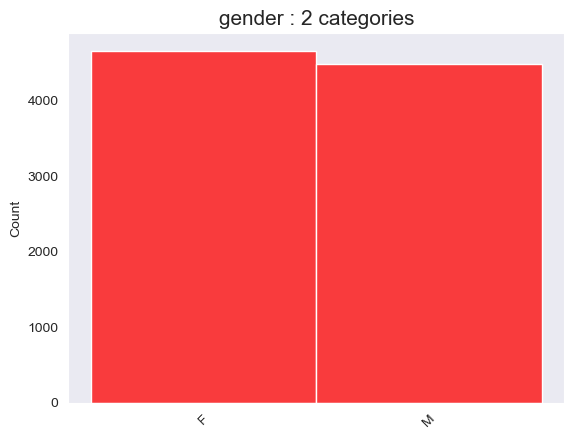

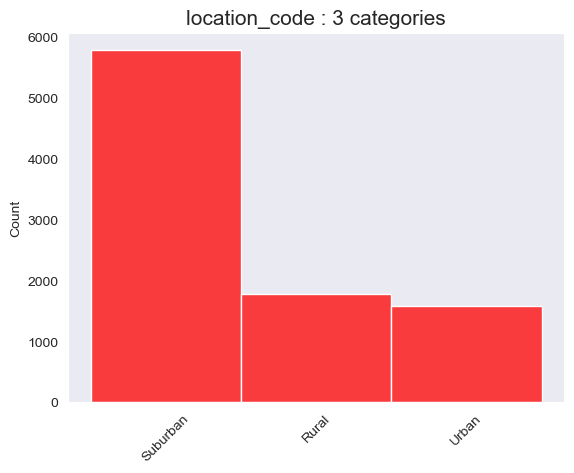

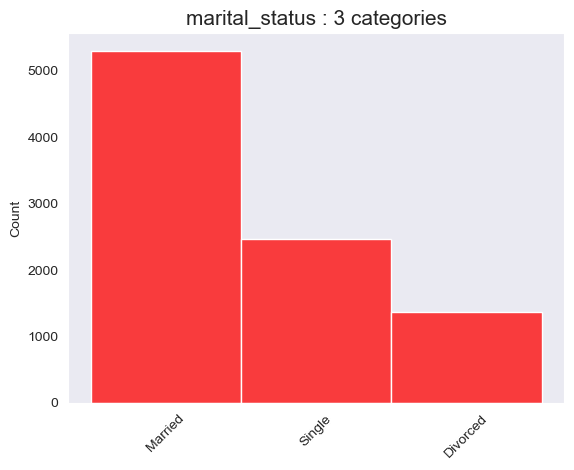

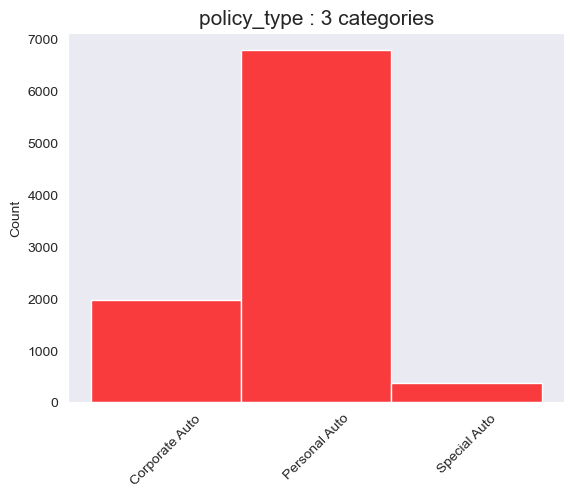

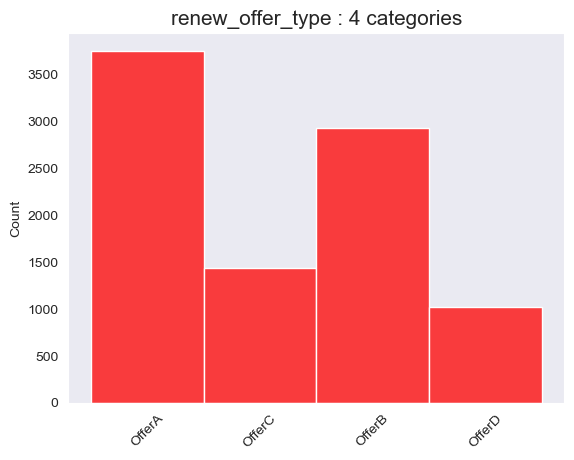

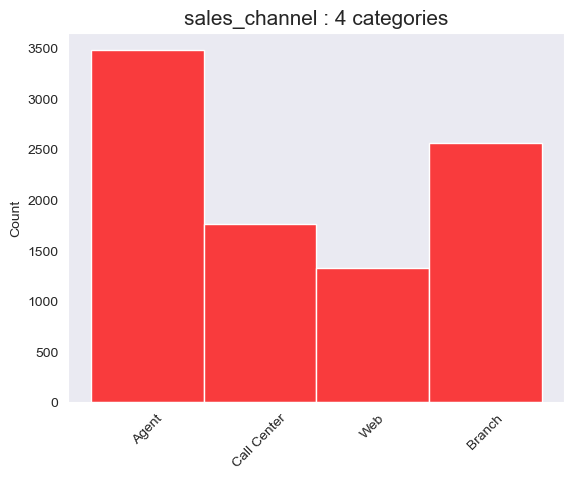

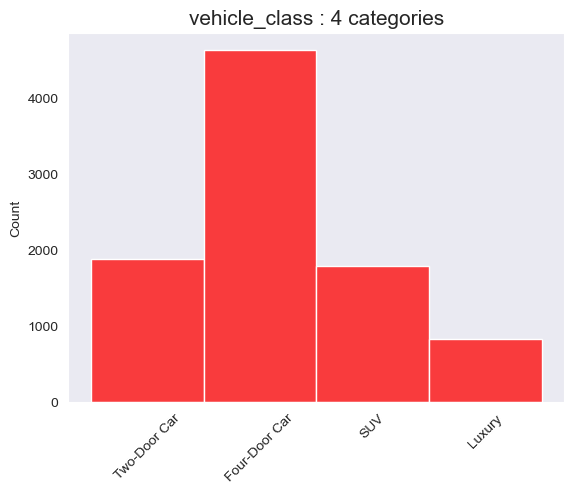

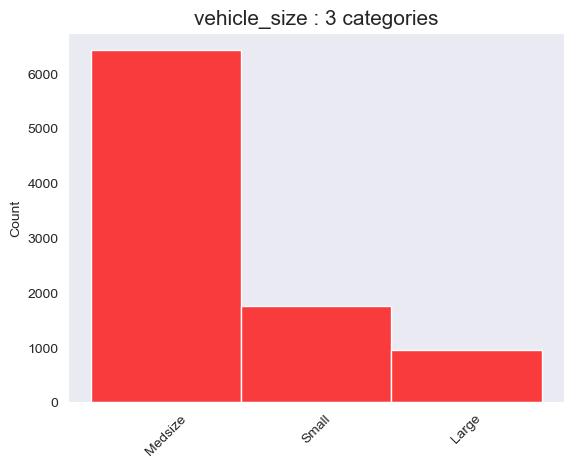

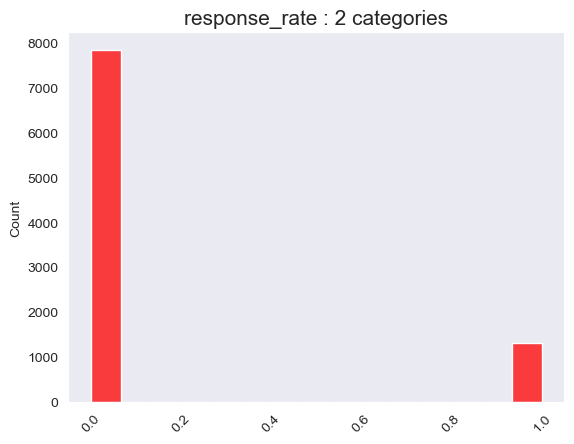

In [43]:
def plot_dist(categorical):
    sns.set_style("dark")
    for column in categorical.columns:
        title = f"{column} : {len(categorical[column].unique())} categories" # this is the title display of the plot
        sns.histplot(categorical[column], color='red')
        plt.xticks(rotation=45)
        plt.xlabel(None)
        plt.title(title , fontsize =15)
        plt.show()

plot_dist(categorical)

In [44]:
# Under the category 'Education', we can combine Master and Doctor degrees into a single category called 'Postuni'.
# In 'Employment Status', we can group Medical Leaves, Disabled, and Retired individuals into a category called 'Other'.
# In 'Policy', we can reduce the nine categories to just three (L1, L2, and L3), which would still provide the same information.
# For 'Vehicle Class', we can categorize 'Luxury SUV', 'Sports', and 'Luxury Cars' into a single category named 'Premium'.

In [51]:
categorical.dtypes

state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
response_rate         int32
dtype: object

In [52]:
# We are grouping Medical Leaves, Disabled, and Retired individuals into the category 'Other'.
categorical['employment_status'] = np.where(categorical['employment_status'].isin(['Medical Leave','Disabled','Retired']) , 'Other', categorical['employment_status'])


In [53]:
categorical['employment_status'].value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employment_status, dtype: int64

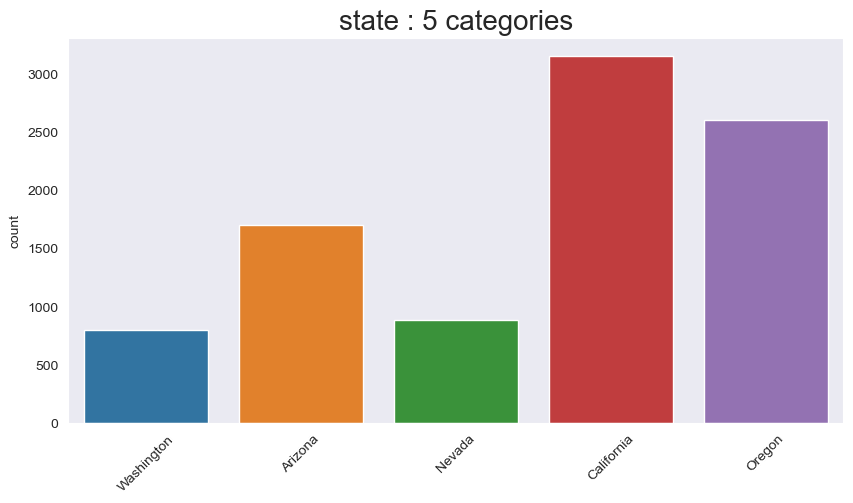

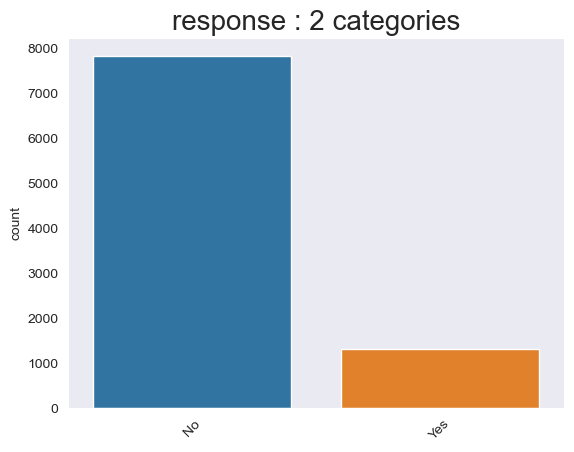

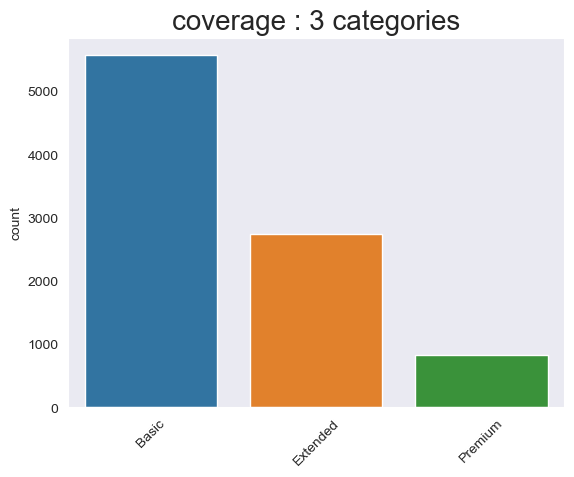

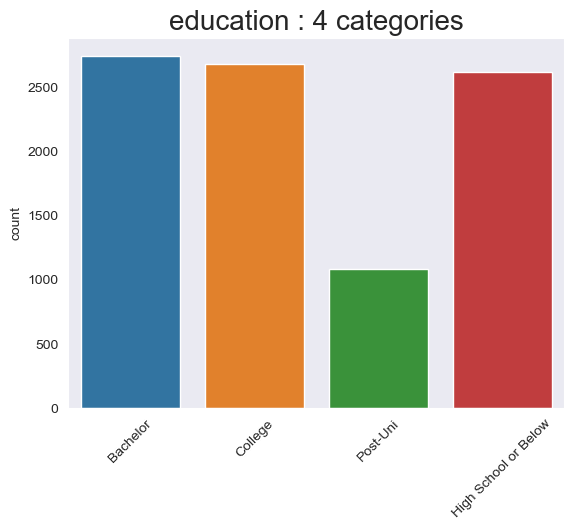

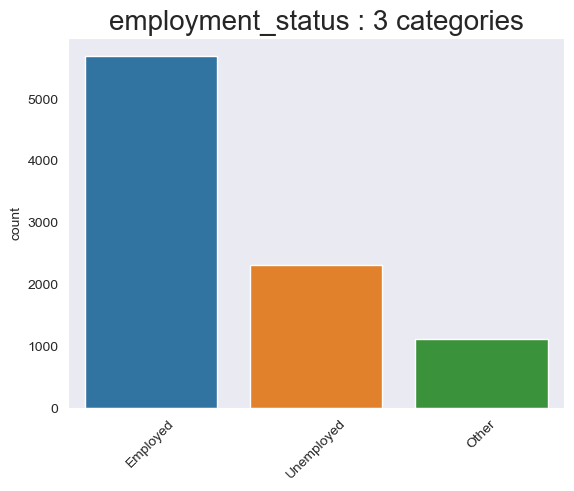

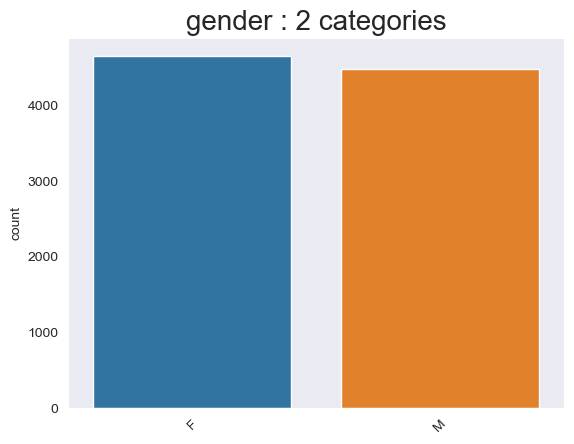

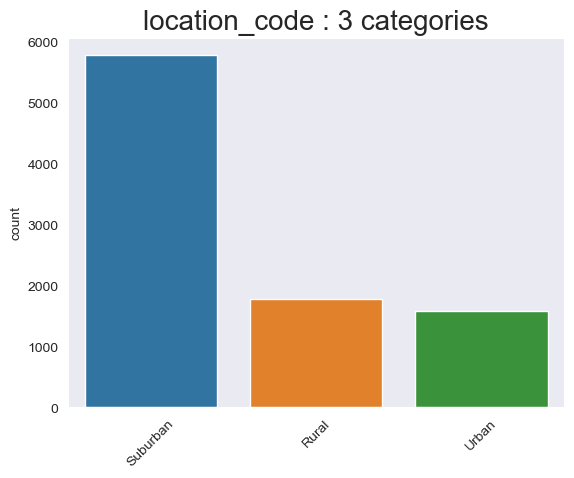

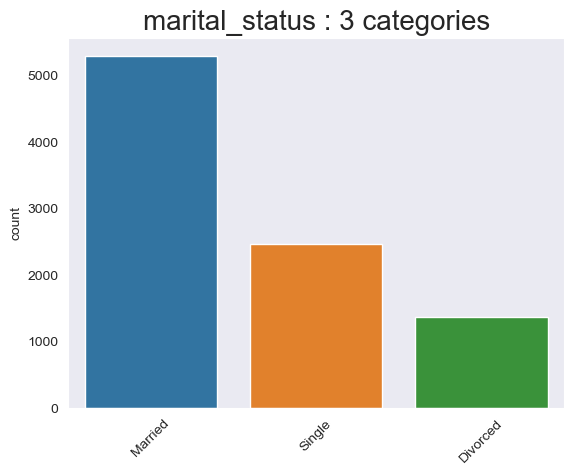

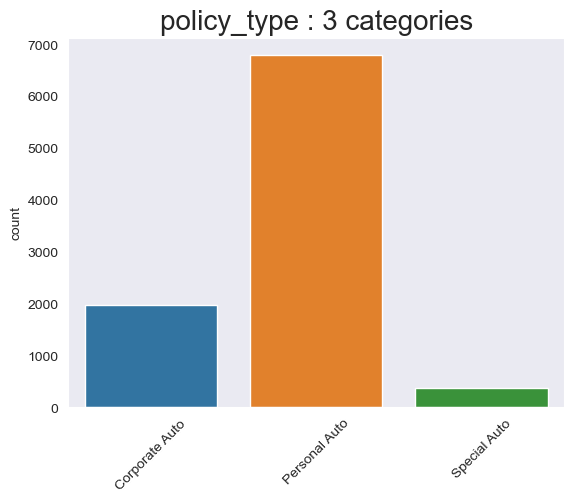

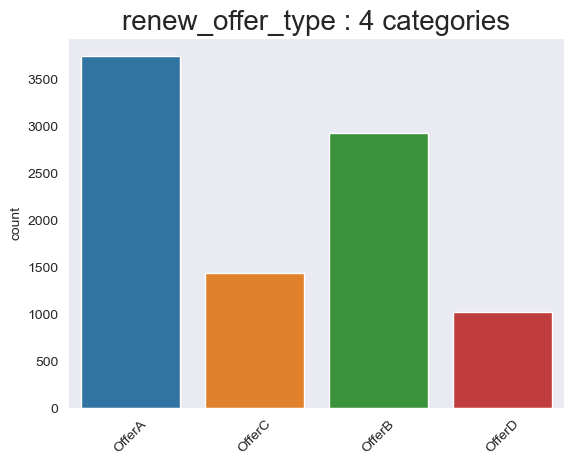

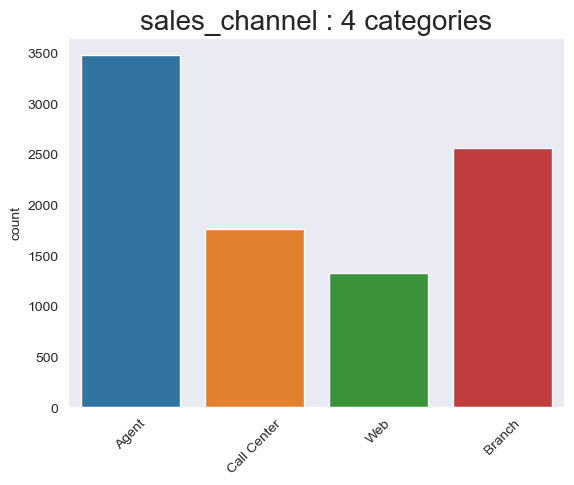

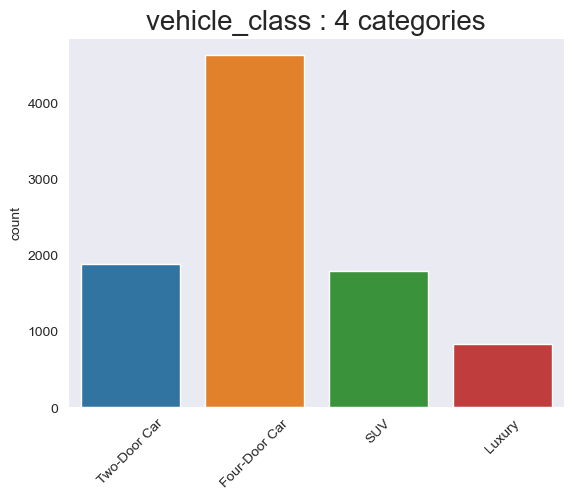

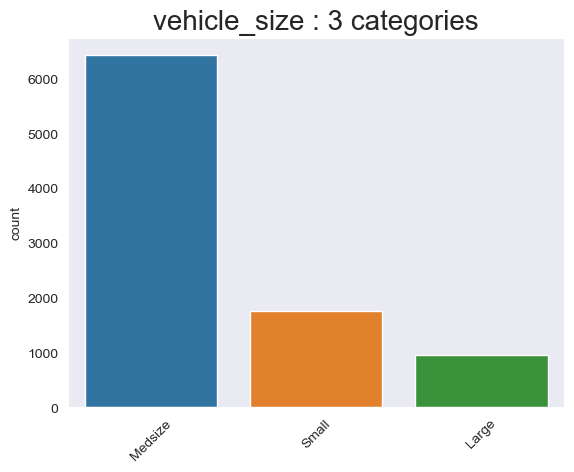

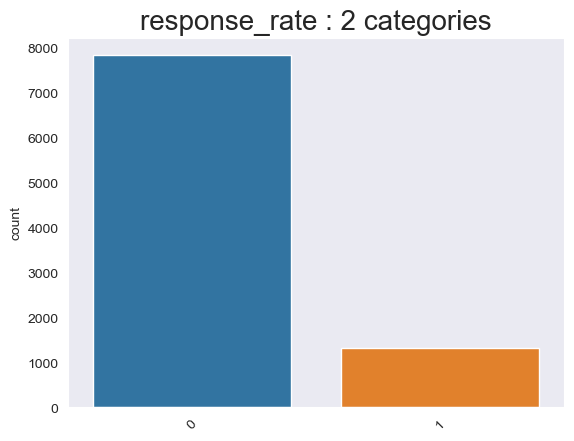

In [59]:
def cntplot_cat(categorical):
    for col in categorical.columns:
        title = f"{col} : {len(categorical[col].unique())} categories"
        sns.countplot(categorical[col])
        plt.xticks(rotation=45)
        plt.xlabel(None)          
        plt.title(title,fontsize=20)
        plt.show()
    return None
   
plt.figure(figsize = (10,5))
cntplot_cat(categorical)

# 4. Plot time variable. Can you extract something from it?

In [61]:
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'])

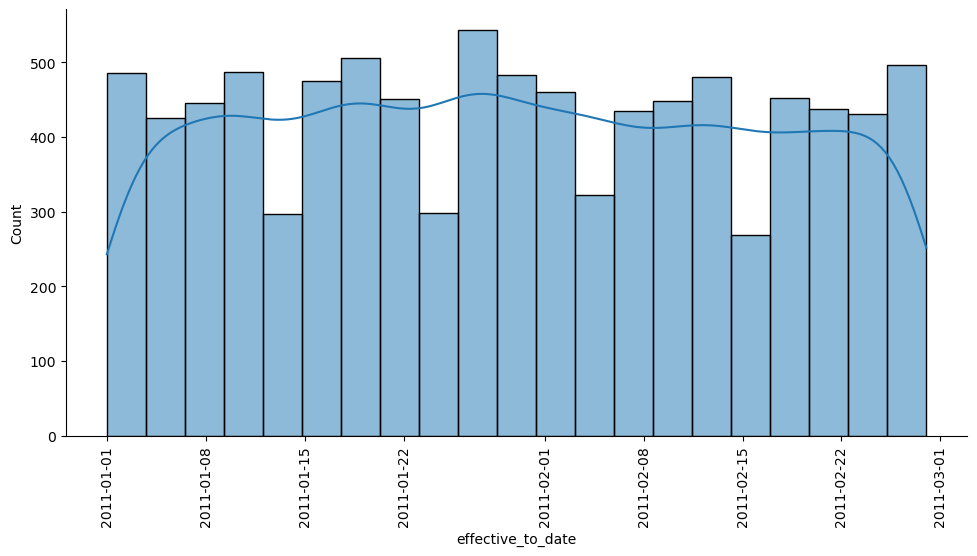

In [62]:
plt.style.use('default')
sns.displot(data=categorical_df, x='effective_to_date', kde=True, height=5,aspect=2)
plt.xticks(rotation=90)
plt.show()

In [63]:
# I dont think we can extract any useful information from it. 